> > PURPOSE?

* train a model that will prdict food prediction specifically in Kenya.

* dataset is retrieved from kaggle.com (market food prices), although its a little outdated

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("wfp_market_food_prices.csv", encoding="ISO-8859-1")

In [3]:
df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP


In [4]:
df.rename(columns={"adm0_id": "country_id", "adm0_name": "country_name", "adm1_id": "locality_id", "adm1_name": "locality_name",
                  "mkt_id": "market_id", "mkt_name": "market_name", "cm_id": "commodity purchase id", "cm_name": "commodity purchased",
                  "cur_id": "currency id", "cur_name": "name of currency", "pt_id": "market type id", "pt_name": "market type (Retail/Wholesale/Producer/Farm Gate)", 
                  "um_id": "measurement id", "um_name": "unit of goods measurement", "mp_month": "month recorded", "mp_year": "year recorded", 
                  "mp_commoditysource": "Source supplying price information", "mp_price": "price"}, inplace=True)

In [5]:
df.head()

,country_id,country_name,locality_id,locality_name,market_id,market_name,commodity purchase id,commodity purchased,currency id,name of currency,market type id,market type (Retail/Wholesale/Producer/Farm Gate),measurement id,unit of goods measurement,month recorded,year recorded,price,Source supplying price information
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP


# select rows that have Kenya, since That is our focus.

In [6]:
df = df.loc[df['country_name']=="Kenya"]

In [7]:
df.head()

,country_id,country_name,locality_id,locality_name,market_id,market_name,commodity purchase id,commodity purchased,currency id,name of currency,market type id,market type (Retail/Wholesale/Producer/Farm Gate),measurement id,unit of goods measurement,month recorded,year recorded,price,Source supplying price information
229882,133,Kenya,51328,Nairobi,184,Nairobi,55,Bread,30,KES,15,Retail,24,400 G,1,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229883,133,Kenya,51328,Nairobi,184,Nairobi,55,Bread,30,KES,15,Retail,24,400 G,2,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229884,133,Kenya,51328,Nairobi,184,Nairobi,55,Bread,30,KES,15,Retail,24,400 G,3,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229885,133,Kenya,51328,Nairobi,184,Nairobi,55,Bread,30,KES,15,Retail,24,400 G,4,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229886,133,Kenya,51328,Nairobi,184,Nairobi,55,Bread,30,KES,15,Retail,24,400 G,5,2006,26.0,Arid Lands Resource Management Project (ALRMP)


## some analysis

In [8]:
df.isnull().sum()

country_id                                           0
country_name                                         0
locality_id                                          0
locality_name                                        0
market_id                                            0
market_name                                          0
commodity purchase id                                0
commodity purchased                                  0
currency id                                          0
name of currency                                     0
market type id                                       0
market type (Retail/Wholesale/Producer/Farm Gate)    0
measurement id                                       0
unit of goods measurement                            0
month recorded                                       0
year recorded                                        0
price                                                0
Source supplying price information                   0
dtype: int

* how many unique values are in each column

In [9]:
for i in df.columns:
    print(i, "\t ===>>", df[i].nunique())

country_id 	 ===>> 1
country_name 	 ===>> 1
locality_id 	 ===>> 6
locality_name 	 ===>> 6
market_id 	 ===>> 14
market_name 	 ===>> 14
commodity purchase id 	 ===>> 10
commodity purchased 	 ===>> 10
currency id 	 ===>> 1
name of currency 	 ===>> 1
market type id 	 ===>> 2
market type (Retail/Wholesale/Producer/Farm Gate) 	 ===>> 2
measurement id 	 ===>> 6
unit of goods measurement 	 ===>> 6
month recorded 	 ===>> 12
year recorded 	 ===>> 12
price 	 ===>> 1885
Source supplying price information 	 ===>> 7


<Figure size 1080x1080 with 0 Axes>

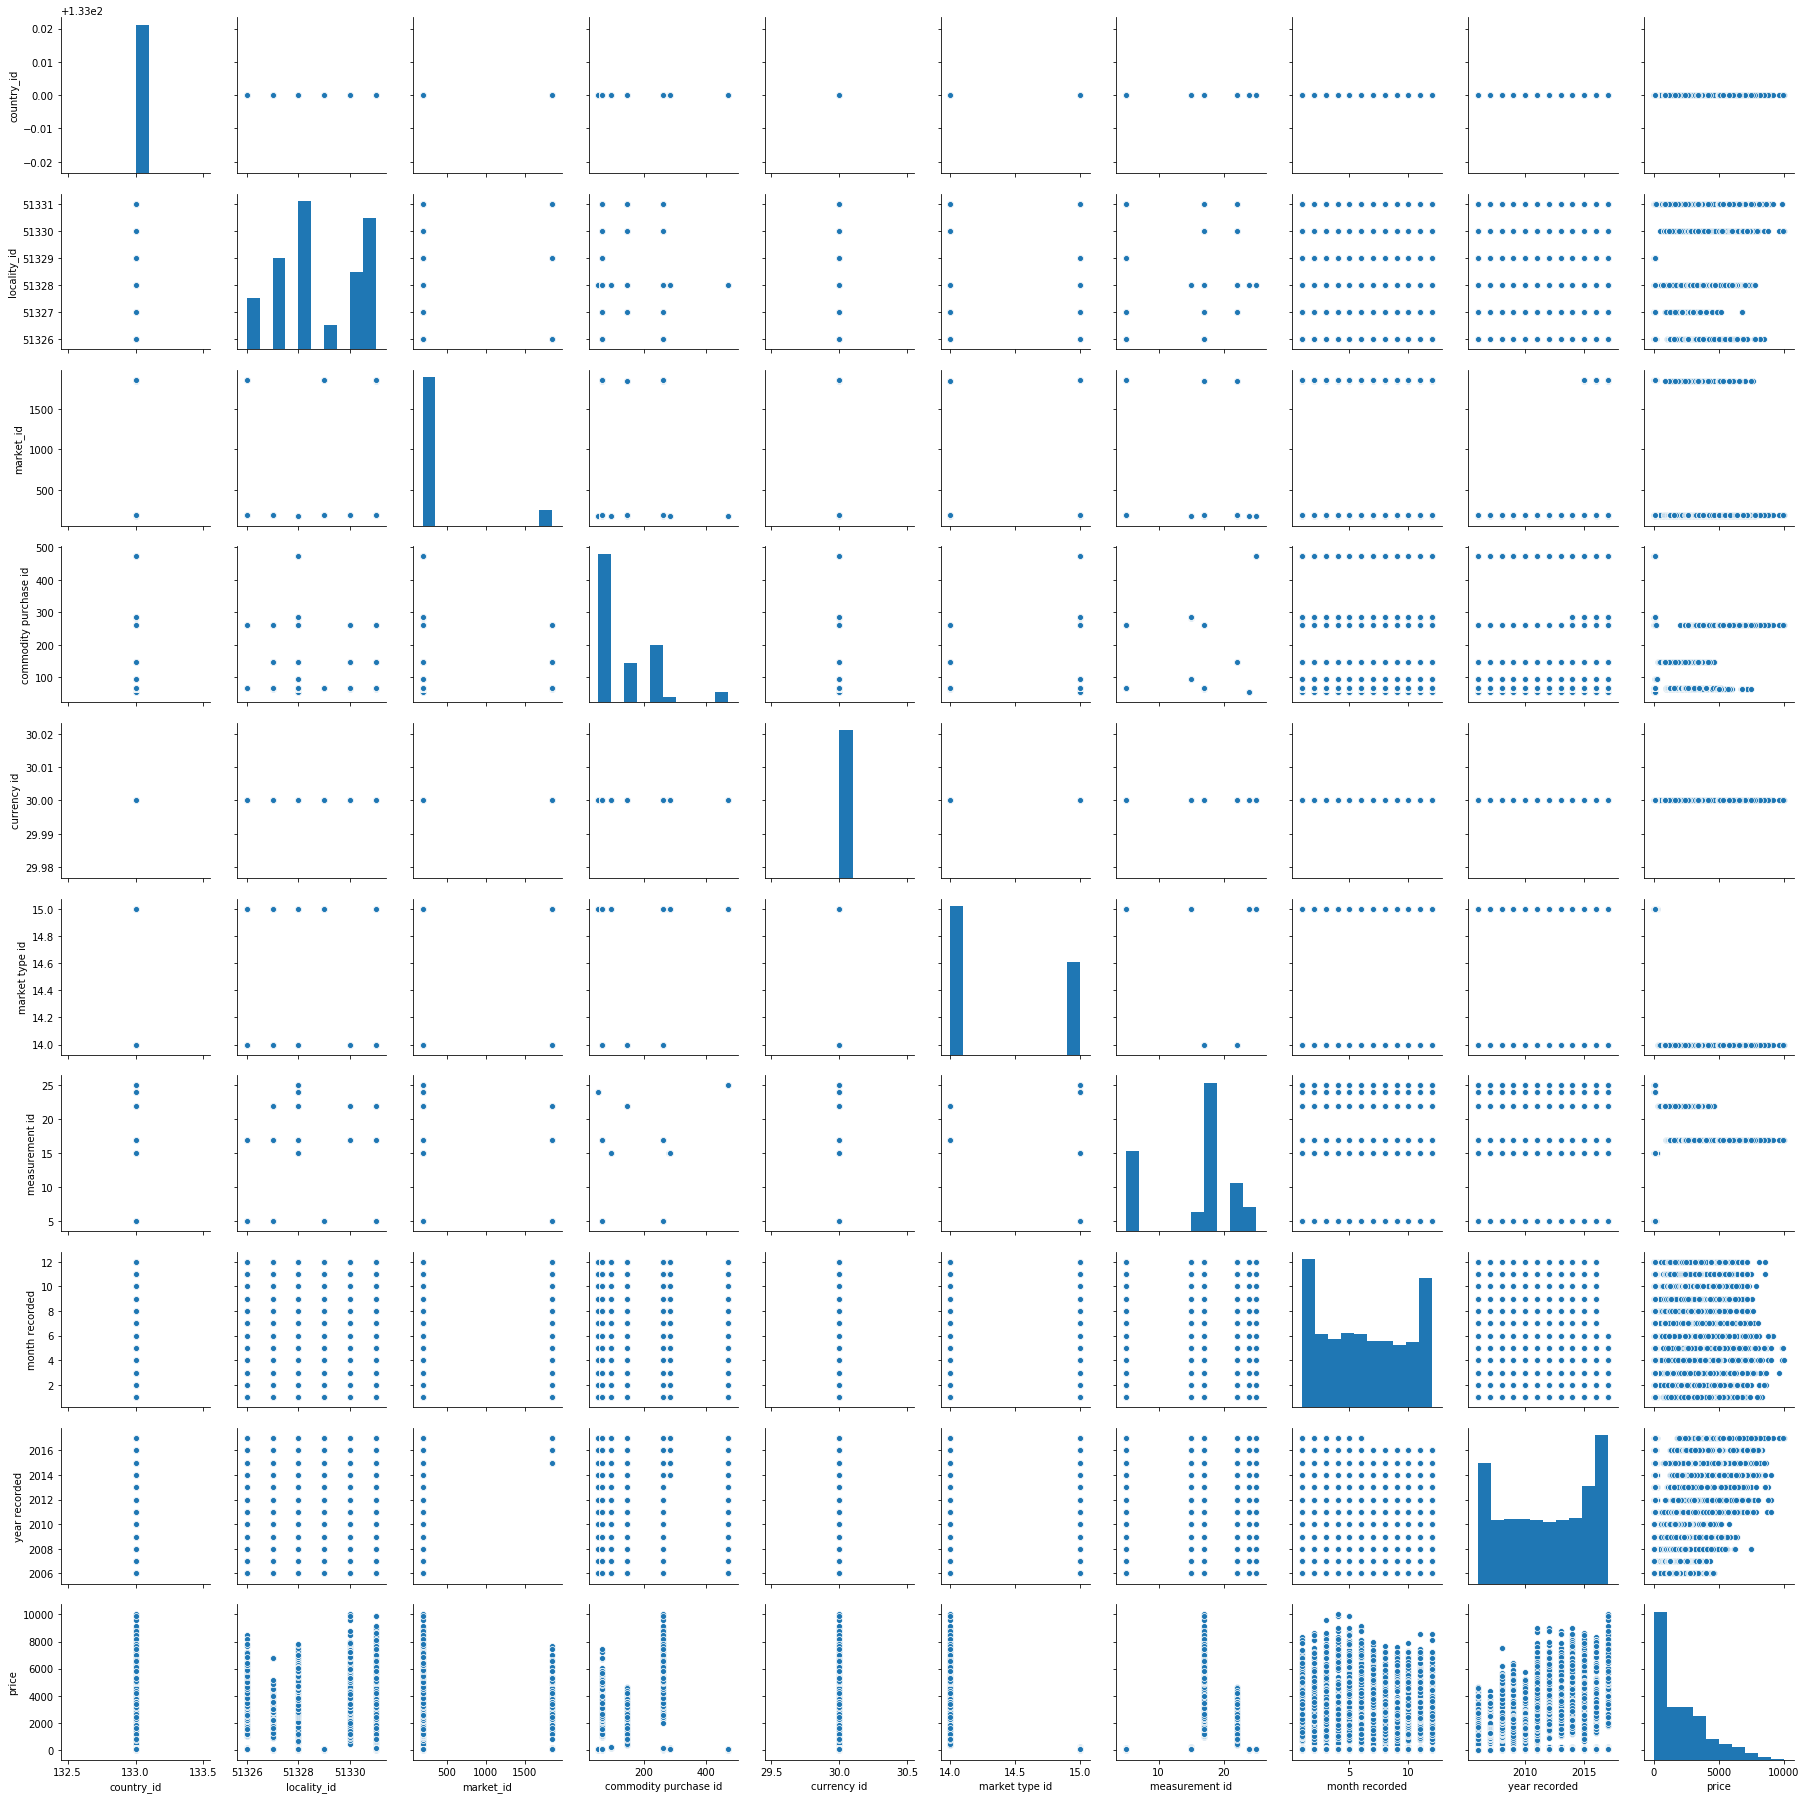

In [10]:
plt.figure(figsize=(15,15))
sns.pairplot(df);

In [11]:
df.head()

,country_id,country_name,locality_id,locality_name,market_id,market_name,commodity purchase id,commodity purchased,currency id,name of currency,market type id,market type (Retail/Wholesale/Producer/Farm Gate),measurement id,unit of goods measurement,month recorded,year recorded,price,Source supplying price information
229882,133,Kenya,51328,Nairobi,184,Nairobi,55,Bread,30,KES,15,Retail,24,400 G,1,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229883,133,Kenya,51328,Nairobi,184,Nairobi,55,Bread,30,KES,15,Retail,24,400 G,2,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229884,133,Kenya,51328,Nairobi,184,Nairobi,55,Bread,30,KES,15,Retail,24,400 G,3,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229885,133,Kenya,51328,Nairobi,184,Nairobi,55,Bread,30,KES,15,Retail,24,400 G,4,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229886,133,Kenya,51328,Nairobi,184,Nairobi,55,Bread,30,KES,15,Retail,24,400 G,5,2006,26.0,Arid Lands Resource Management Project (ALRMP)


* Drop country name and country id since they are the same

In [12]:
df.drop(df[['country_name', 'country_id']], inplace=True, axis=1)

* Drop name of currency since its same throughout

In [13]:
df.drop('name of currency', axis=1, inplace=True)

In [14]:
df.head()

,locality_id,locality_name,market_id,market_name,commodity purchase id,commodity purchased,currency id,market type id,market type (Retail/Wholesale/Producer/Farm Gate),measurement id,unit of goods measurement,month recorded,year recorded,price,Source supplying price information
229882,51328,Nairobi,184,Nairobi,55,Bread,30,15,Retail,24,400 G,1,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229883,51328,Nairobi,184,Nairobi,55,Bread,30,15,Retail,24,400 G,2,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229884,51328,Nairobi,184,Nairobi,55,Bread,30,15,Retail,24,400 G,3,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229885,51328,Nairobi,184,Nairobi,55,Bread,30,15,Retail,24,400 G,4,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229886,51328,Nairobi,184,Nairobi,55,Bread,30,15,Retail,24,400 G,5,2006,26.0,Arid Lands Resource Management Project (ALRMP)


* find correlation

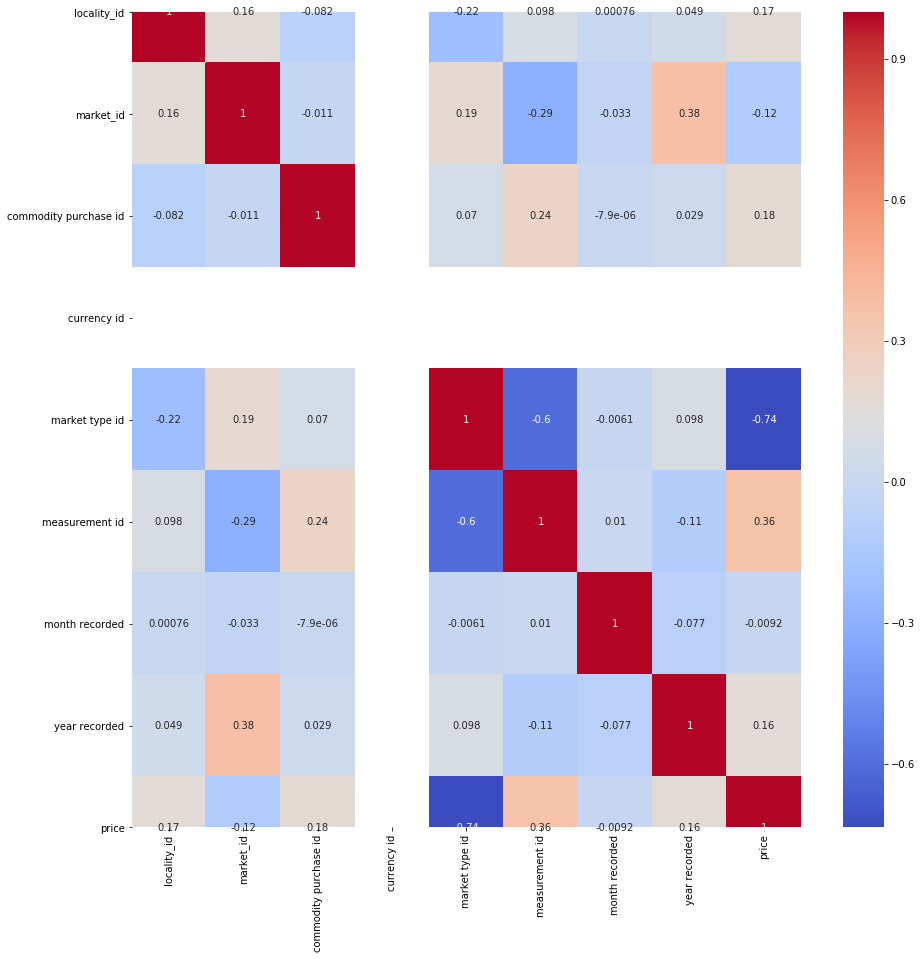

In [15]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr('pearson'), cbar=True, cmap="coolwarm", annot=True);

* visualization of market_name

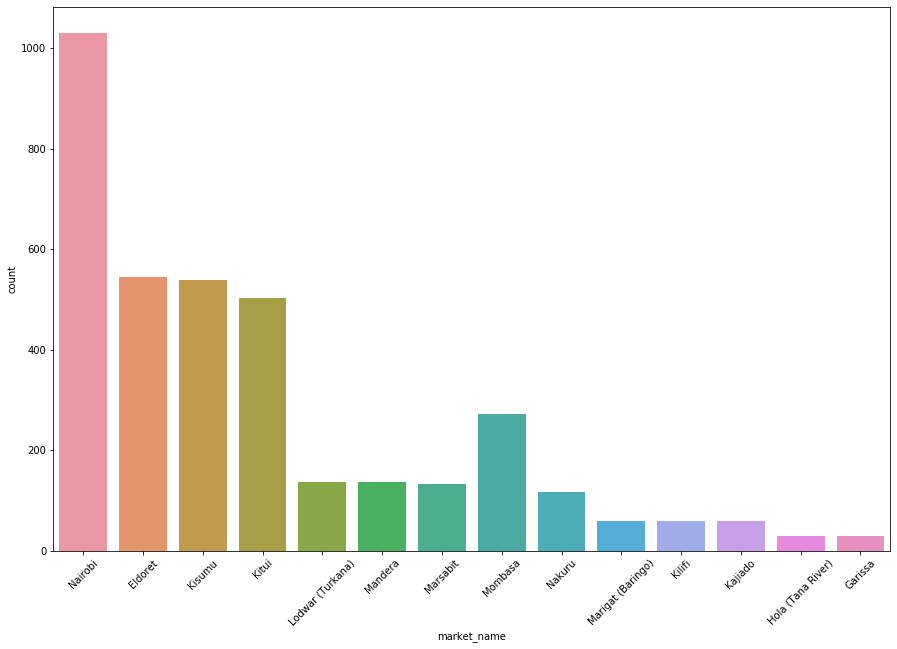

In [16]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)
sns.countplot(data=df, x='market_name');

> nairobi has the most number of market featuring, Garissa has the least

In [17]:
df.columns

Index(['locality_id', 'locality_name', 'market_id', 'market_name',
       'commodity purchase id', 'commodity purchased', 'currency id',
       'market type id', 'market type (Retail/Wholesale/Producer/Farm Gate)',
       'measurement id', 'unit of goods measurement', 'month recorded',
       'year recorded', 'price', 'Source supplying price information'],
      dtype='object')

* locality name

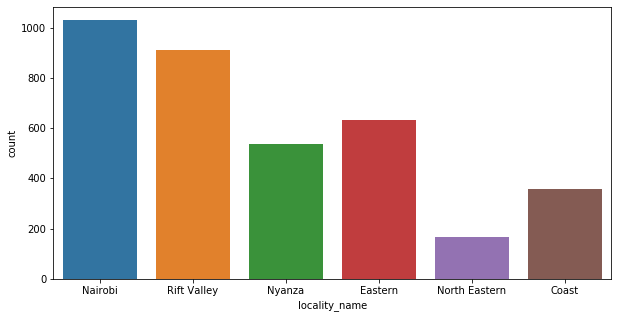

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='locality_name');

* commodity purchased

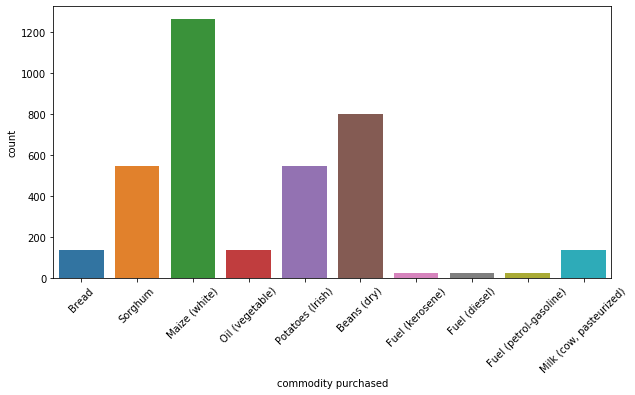

In [20]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=45)
sns.countplot(data=df, x='commodity purchased');

* market type

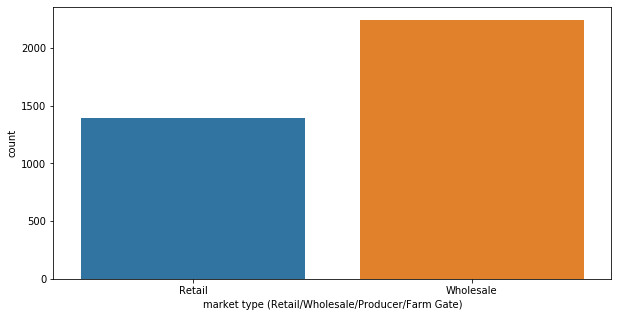

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='market type (Retail/Wholesale/Producer/Farm Gate)');

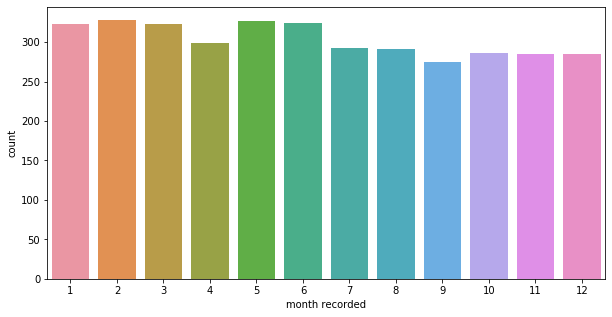

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='month recorded');

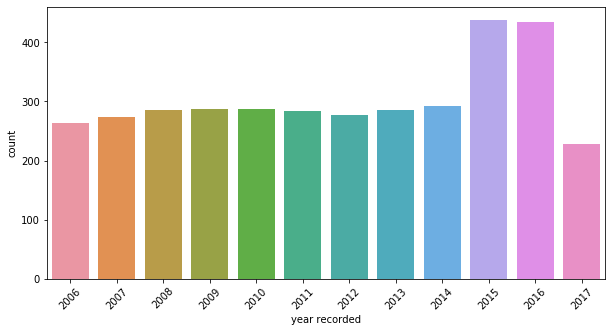

In [25]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=45)
sns.countplot(data=df, x='year recorded');

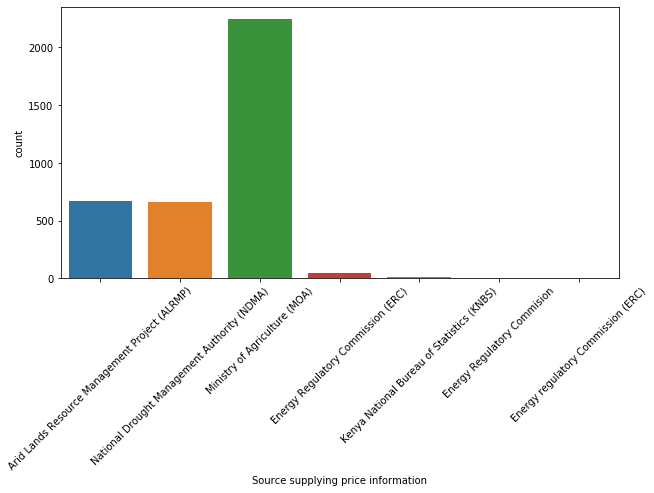

In [26]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=45)
sns.countplot(data=df, x='Source supplying price information');

In [27]:
df.head()

,locality_id,locality_name,market_id,market_name,commodity purchase id,commodity purchased,currency id,market type id,market type (Retail/Wholesale/Producer/Farm Gate),measurement id,unit of goods measurement,month recorded,year recorded,price,Source supplying price information
229882,51328,Nairobi,184,Nairobi,55,Bread,30,15,Retail,24,400 G,1,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229883,51328,Nairobi,184,Nairobi,55,Bread,30,15,Retail,24,400 G,2,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229884,51328,Nairobi,184,Nairobi,55,Bread,30,15,Retail,24,400 G,3,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229885,51328,Nairobi,184,Nairobi,55,Bread,30,15,Retail,24,400 G,4,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229886,51328,Nairobi,184,Nairobi,55,Bread,30,15,Retail,24,400 G,5,2006,26.0,Arid Lands Resource Management Project (ALRMP)


* drop columns that are id

In [28]:
df.columns

Index(['locality_id', 'locality_name', 'market_id', 'market_name',
       'commodity purchase id', 'commodity purchased', 'currency id',
       'market type id', 'market type (Retail/Wholesale/Producer/Farm Gate)',
       'measurement id', 'unit of goods measurement', 'month recorded',
       'year recorded', 'price', 'Source supplying price information'],
      dtype='object')

In [30]:
df.drop(df[['locality_id', 'market_id', 'commodity purchase id', 'currency id', 'market type id', 'measurement id']], axis=1, inplace=True)

In [31]:
df.head()

,locality_name,market_name,commodity purchased,market type (Retail/Wholesale/Producer/Farm Gate),unit of goods measurement,month recorded,year recorded,price,Source supplying price information
229882,Nairobi,Nairobi,Bread,Retail,400 G,1,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229883,Nairobi,Nairobi,Bread,Retail,400 G,2,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229884,Nairobi,Nairobi,Bread,Retail,400 G,3,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229885,Nairobi,Nairobi,Bread,Retail,400 G,4,2006,26.0,Arid Lands Resource Management Project (ALRMP)
229886,Nairobi,Nairobi,Bread,Retail,400 G,5,2006,26.0,Arid Lands Resource Management Project (ALRMP)


In [32]:
df.shape

(3639, 9)

* total number of columns will be creating when we OneHotEncode

In [34]:
counter = 0
for _ in df.columns:
    if df[_].dtype == "object":
        counter += df[_].nunique()
print(counter)

45


> i will be encoding using pandas get_dummies()

In [36]:
df.select_dtypes("O").columns

Index(['locality_name', 'market_name', 'commodity purchased',
       'market type (Retail/Wholesale/Producer/Farm Gate)',
       'unit of goods measurement', 'Source supplying price information'],
      dtype='object')

In [59]:
locality_name = pd.get_dummies(df['locality_name'])
market_name = pd.get_dummies(df['market_name'])
commodity = pd.get_dummies(df['commodity purchased'])
market_type = pd.get_dummies(df['market type (Retail/Wholesale/Producer/Farm Gate)'])
source = pd.get_dummies(df['Source supplying price information'])
measurements = pd.get_dummies(df['unit of goods measurement'])

In [65]:
# concatinate
df = pd.concat([df, locality_name, market_name, commodity, market_type, source, measurements], axis=1)

In [67]:
pd.set_option('max_columns', 54)
df.head()

,locality_name,market_name,commodity purchased,market type (Retail/Wholesale/Producer/Farm Gate),unit of goods measurement,month recorded,year recorded,price,Source supplying price information,Coast,Eastern,Nairobi,North Eastern,Nyanza,Rift Valley,Eldoret,Garissa,Hola (Tana River),Kajiado,Kilifi,Kisumu,Kitui,Lodwar (Turkana),Mandera,Marigat (Baringo),Marsabit,Mombasa,Nairobi,Nakuru,Beans (dry),Bread,Fuel (diesel),Fuel (kerosene),Fuel (petrol-gasoline),Maize (white),"Milk (cow, pasteurized)",Oil (vegetable),Potatoes (Irish),Sorghum,Retail,Wholesale,Arid Lands Resource Management Project (ALRMP),Energy Regulatory Commision,Energy Regulatory Commission (ERC),Energy regulatory Commission (ERC),Kenya National Bureau of Statistics (KNBS),Ministry of Agriculture (MOA),National Drought Management Authority (NDMA),400 G,50 KG,500 ML,90 KG,KG,L
229882,Nairobi,Nairobi,Bread,Retail,400 G,1,2006,26.0,Arid Lands Resource Management Project (ALRMP),0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
229883,Nairobi,Nairobi,Bread,Retail,400 G,2,2006,26.0,Arid Lands Resource Management Project (ALRMP),0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
229884,Nairobi,Nairobi,Bread,Retail,400 G,3,2006,26.0,Arid Lands Resource Management Project (ALRMP),0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
229885,Nairobi,Nairobi,Bread,Retail,400 G,4,2006,26.0,Arid Lands Resource Management Project (ALRMP),0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
229886,Nairobi,Nairobi,Bread,Retail,400 G,5,2006,26.0,Arid Lands Resource Management Project (ALRMP),0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0


* drop the categorical data

In [78]:
df.drop(df.select_dtypes("O").columns, axis=1, inplace=True)

In [79]:
df.head()

,month recorded,year recorded,price,Coast,Eastern,Nairobi,North Eastern,Nyanza,Rift Valley,Eldoret,Garissa,Hola (Tana River),Kajiado,Kilifi,Kisumu,Kitui,Lodwar (Turkana),Mandera,Marigat (Baringo),Marsabit,Mombasa,Nairobi,Nakuru,Beans (dry),Bread,Fuel (diesel),Fuel (kerosene),Fuel (petrol-gasoline),Maize (white),"Milk (cow, pasteurized)",Oil (vegetable),Potatoes (Irish),Sorghum,Retail,Wholesale,Arid Lands Resource Management Project (ALRMP),Energy Regulatory Commision,Energy Regulatory Commission (ERC),Energy regulatory Commission (ERC),Kenya National Bureau of Statistics (KNBS),Ministry of Agriculture (MOA),National Drought Management Authority (NDMA),400 G,50 KG,500 ML,90 KG,KG,L
229882,1,2006,26.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
229883,2,2006,26.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
229884,3,2006,26.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
229885,4,2006,26.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
229886,5,2006,26.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0


* What is the correlation?

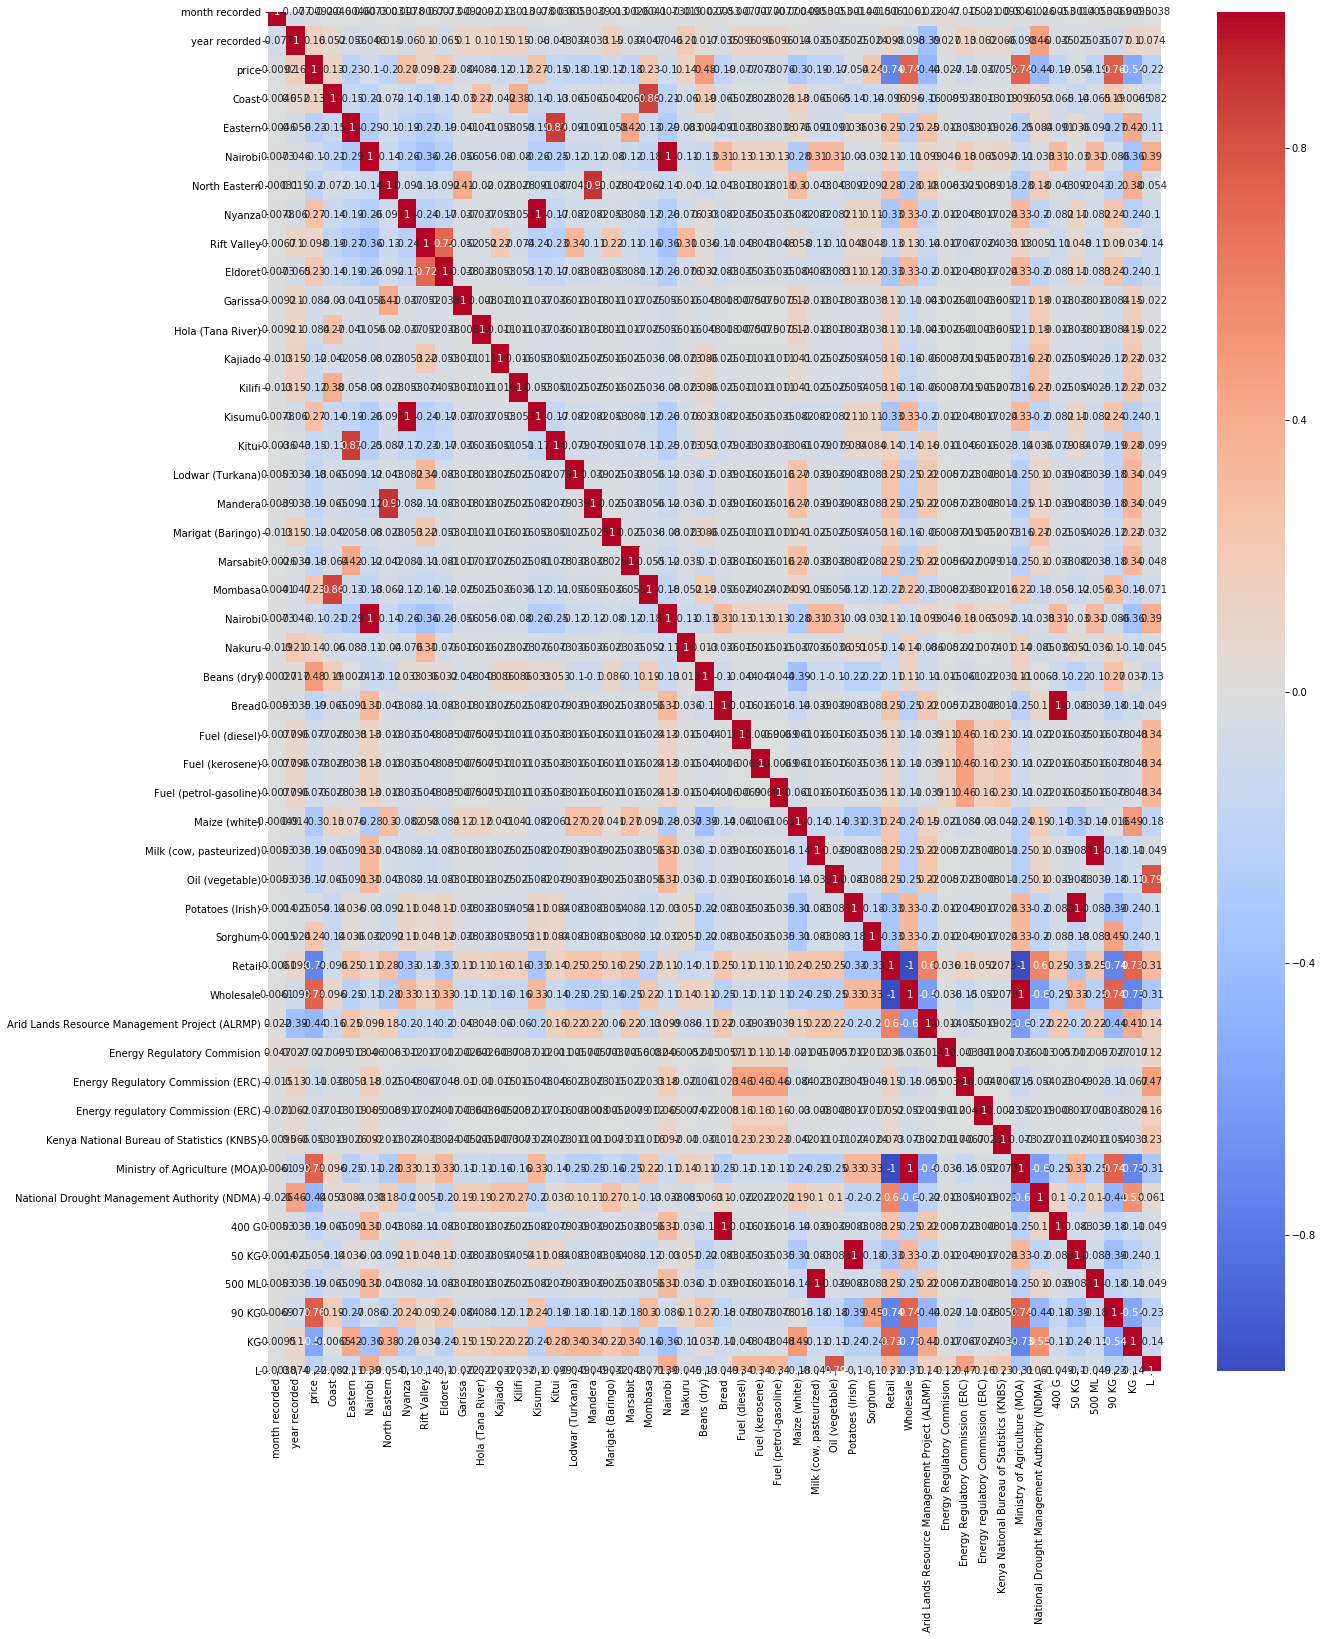

In [81]:
plt.figure(figsize=(20,25))
sns.heatmap(df.corr('pearson'), cbar=True, annot=True, cmap="coolwarm");

## trian model

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [83]:
y = df['price']

In [84]:
X = df.drop('price', axis=1)

In [85]:
# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)

In [86]:
#train model
model = LinearRegression()

In [87]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
# get coefficent
model.coef_

array([-4.63753049e-01,  2.26727427e+02, -9.98989707e+01,  2.39916404e+02,
       -2.52131658e+02,  5.38807066e+02, -1.27802050e+02, -2.98890791e+02,
       -1.46284140e+02,  1.61459914e+02,  7.68075706e+02, -2.04467927e+02,
       -2.32956761e+02, -1.27802050e+02, -4.60051535e+02,  1.25799679e+03,
        3.77347152e+02, -4.54358538e+02,  6.99967939e+02, -6.35017916e+02,
       -2.52131658e+02, -7.51776980e+02,  1.56675985e+03,  1.19076053e+01,
       -1.27187884e+02, -7.75109053e+01, -6.50152361e+01, -6.45557177e+02,
       -2.58297823e+01,  1.96182849e+02, -3.54729005e+02, -4.79020314e+02,
       -8.94922719e+02,  8.94922719e+02,  9.55466476e+02, -1.65784672e+02,
       -3.28602423e+02, -6.57201680e+02, -3.72972975e+02,  8.94922719e+02,
       -3.25827446e+02,  1.19076053e+01, -3.54729005e+02, -2.58297823e+01,
        1.24965172e+03, -8.07469366e+02, -7.35311762e+01])

In [89]:
pred = model.predict(x_test)

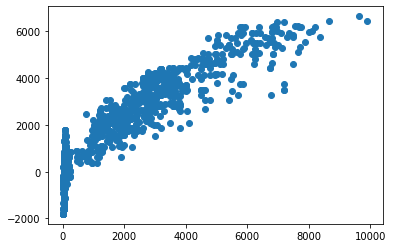

In [91]:
plt.scatter(y_test, pred);

In [92]:
from sklearn import metrics

In [93]:
print("MAE:\t", metrics.mean_absolute_error(y_test, pred))
print("MSE:\t", metrics.mean_squared_error(y_test, pred))
print("RMSE:\t", np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE:	 628.9585228452577
MSE:	 681600.0983271941
RMSE:	 825.5907571716111


In [100]:
y_test

232691      49.000
231775    1289.439
231380    5670.000
230138    3075.000
231493    2354.000
            ...   
233448      79.170
230504    2047.212
231196     485.379
233308      37.000
233326     102.000
Name: price, Length: 1092, dtype: float64

# save model

In [102]:
import pickle

In [105]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, "wb"))